# Sparse Dictionary Learning Tests

In this notebook we will be preforming tests to show the abilities of our sparse dictionary learning algorithm.

In [45]:
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%run Classes.py

### Evaluation Criteria

We will be using MSE and the Stochastic Partial Image Reconstruction to estimate error.

## Task 1: Image Compression/Reconstruction

This task is to take a single image, compress it (patch by patch) with sparse coding, and then reconstruct it. We will do this in two different ways: One way is by training our dictionary on a group of sample images, the other is by training using only the single test image. The purpose of the second method is to get a "best case" scenario of our algorithms preformance.


***Method A: Same Image Training***
Here we will train our dictionary on a single image, the same image that we will be testing on. The purpose of this is to get a "best case" scenario of our algorithms preformance.

***Method B: Multiple Image Training***
Here we will train our dictionary on a group of images, and then test it on an unseen test image.


In [6]:
learner = DictionaryLearner()

In [19]:
img = cv2.imread('Original Images/cheese_board.jpg')
img.shape[:2] / np.array([20,20])

array([153.6, 204. ])

In [10]:
# Load the image
img = cv2.imread('dinner.jpg', cv2.IMREAD_COLOR)

# Resize the image to 400x300 pixels
img_resized = cv2.resize(img, (200, 150), interpolation=cv2.INTER_AREA)

# Convert the resized image to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Save the grayscale image as 'small_gray_dinner.png'
cv2.imwrite('small_gray_dinner.png', img_gray )

array([[[ 51,  50,  52],
        [ 52,  51,  53],
        [ 55,  54,  56],
        ...,
        [ 22,  28,  39],
        [ 20,  26,  37],
        [ 18,  24,  35]],

       [[ 57,  56,  58],
        [ 58,  57,  59],
        [ 59,  58,  60],
        ...,
        [ 18,  24,  35],
        [ 18,  24,  35],
        [ 19,  25,  36]],

       [[ 56,  55,  57],
        [ 56,  55,  57],
        [ 57,  56,  58],
        ...,
        [ 19,  25,  36],
        [ 20,  26,  37],
        [ 20,  26,  37]],

       ...,

       [[ 96, 108, 118],
        [103, 115, 125],
        [103, 115, 125],
        ...,
        [112, 110, 122],
        [111, 110, 120],
        [111, 110, 120]],

       [[ 93, 105, 115],
        [104, 116, 126],
        [105, 117, 127],
        ...,
        [112, 110, 122],
        [113, 109, 120],
        [114, 110, 121]],

       [[ 90, 102, 112],
        [104, 116, 126],
        [107, 119, 129],
        ...,
        [111, 109, 121],
        [113, 109, 120],
        [114, 110, 121]]

In [20]:
paths = ['cheese_board.jpg', 'chicken_n_beans.jpg', 'octopus.jpg', 'tea_eggs.jpg', 'persimmon_tomato_salad.jpg']

In [32]:
paths = ['Compressed Images/cheese_board.jpg']
new_path = 'Reconstructed Images/cheese_boardL'
N = 512
K = 256
I = 10
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

In [35]:

with open('Graphs/cheese_board_dictionaries.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)


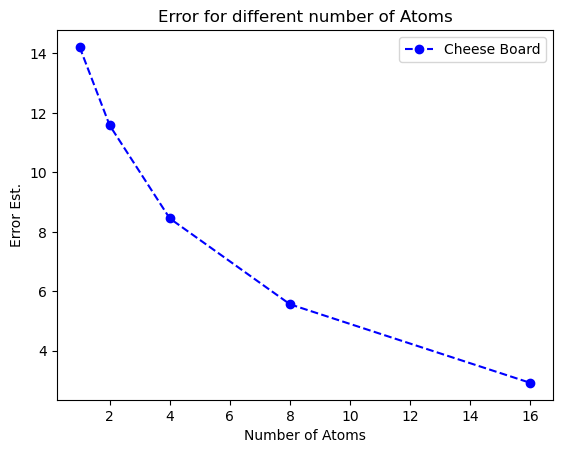

In [36]:
xs = Ls
ys = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()


In [37]:
paths = ['Compressed Images/chicken_n_beans.jpg']
new_path = 'Reconstructed Images/chicken_n_beansL'
N = 256
K = 128
I = 1
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [5,10,20] # Depends on what I see, but probably [2, 8, 10, 16]? [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

with open('Graphs/chicken_n_beans.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

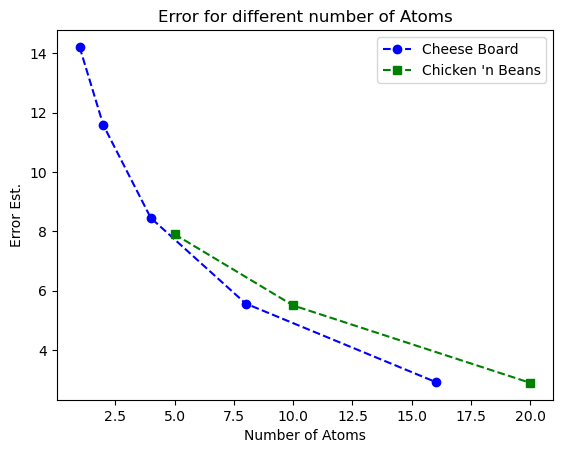

In [38]:
xs2 = Ls
ys2 = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.plot(xs2, ys2, linestyle='--', marker='s', color='green', label = "Chicken 'n Beans")
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()

In [41]:
paths = ['Compressed Images/persimmon_tomato_salad.jpg']
new_path = 'Reconstructed Images/persimmon_tomato_saladL'
N = 512
K = 256
I = 5
percent= .2
min_count = 1
patch_shape = np.array([8,8])

sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

dictionaries = []
Ls = [5,10,16] # Depends on what I see, but probably [2, 8, 10, 16]? [1, 2, 4, 8, 16]
for L in Ls:
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
    D = learner.sparse_dictionary_learning(iters = I, output = True)
    (recon, error) =  learner.SPIR(path = paths[0], percent=percent, min_count=min_count)
    dictionaries.append((L, D, error))
    cv2.imwrite(new_path + str(L) + '.jpg', recon)

with open('Graphs/persimmon_tomato_salad.pkl', 'wb') as f:
    pickle.dump(dictionaries, f)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

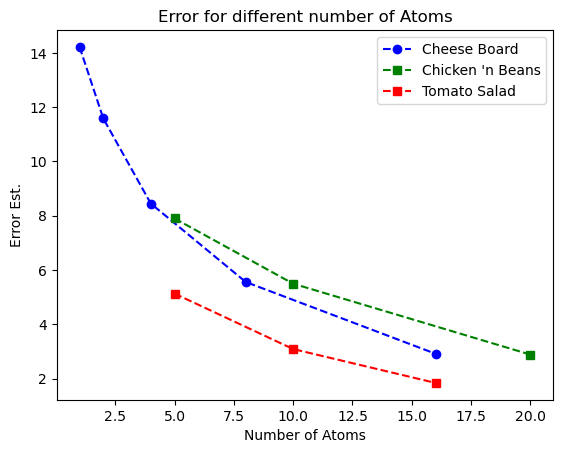

In [42]:
xs3 = Ls
ys3 = [ error for L, dic, error in dictionaries]


plt.plot(xs, ys, linestyle='--', marker='o', color='blue', label = 'Cheese Board')
plt.plot(xs2, ys2, linestyle='--', marker='s', color='green', label = "Chicken 'n Beans")
plt.plot(xs3, ys3, linestyle='--', marker='s', color='red', label = "Tomato Salad")
plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different number of Atoms')
plt.legend()
plt.savefig('Graphs/Error_Est_for_L.png')
plt.show()

### Results


#### Cheese Board
As a reminder, the parameters for this one were: N = 512, K = 256, I = 10

| L = 1, Error = 14.21                                                                          | L = 2, Error = 8.45                                                                           | L = 4, Error = 11.58                                                                          |
|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| <img alt="Caption 1" height="300" src="Reconstructed Images/cheese_boardL1.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL2.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL4.jpg" width="400"/> |

| L = 8, Error = 5.56                                                                           | L = 16, Error = 2.92                                                                           | Original                                                                                 |
|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| <img alt="Caption 1" height="300" src="Reconstructed Images/cheese_boardL8.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/cheese_boardL16.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Compressed Images/cheese_board.jpg" width="400"/> |

#### Chicken 'n Beans
The parameters for this one were: N = 256, K = 128, I = 1

| L = 5, Error = 7.90                                                                              | L = 10, Error = 5.49                                                                              | L = 20, Error = 2.89                                                                              |Original                                                                                 |
|--------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|----|
| <img alt="Caption 1" height="300" src="Reconstructed Images/chicken_n_beansL5.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/chicken_n_beansL10.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/chicken_n_beansL20.jpg" width="400"/> |<img alt="Caption 2" height="300" src="Compressed Images/chicken_n_beans.jpg" width="400"/> |

#### Tomato Salad
The parameters for this one were: N = 512, K = 256, I = 5

| L = 5, Error =                                                                                          | L = 10, Error =                                                                                      | L = 16, Error =                                                                                          |Original                                                                                 |
|---------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|----|
| <img alt="Caption 1" height="300" src="Reconstructed Images/persimmon_tomato_saladL5.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/persimmon_tomato_saladL10.jpg" width="400"/> | <img alt="Caption 2" height="300" src="Reconstructed Images/persimmon_tomato_saladL16.jpg" width="400"/> |<img alt="Caption 2" height="300" src="Compressed Images/persimmon_tomato_salad.jpg" width="400"/> |

### Method B

Unseen data

In [46]:
paths = ['Compressed Images/cheese_board.jpg', 'Compressed Images/chicken_n_beans.jpg', 'Compressed Images/persimmon_tomato_salad.jpg', 'Compressed Images/tea_eggs.jpg']
new_path = 'Reconstructed Images/octopus'
path = 'Compressed Images/octopus.jpg'

K = 128
I = 10
percent= .2
min_count = 1
patch_shape = np.array([8,8])

#Ns = [186, 256, 512, 1042]
Ns = [512, 1842]
octopus_errors = {}
for N in Ns:
    octopus_errors[N] = []
    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

    dictionaries = []
    #Ls = [1, 2, 4, 8, 16]
    Ls = [2,4,8]
    for L in Ls:
        learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
        D = learner.sparse_dictionary_learning(iters = I, output = True)
        (recon, error) =  learner.SPIR(path = path, percent=percent, min_count=min_count)
        dictionaries.append((L, N, D, error))
        correct_path = new_path + 'N' + str(N) + 'L' + str(L) + '.jpg'
        cv2.imwrite(correct_path, recon)

        octopus_errors[N].append(error)

    with open('Graphs/octopusN' + str(N) + '.pkl', 'wb') as f:
        pickle.dump(dictionaries, f)



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

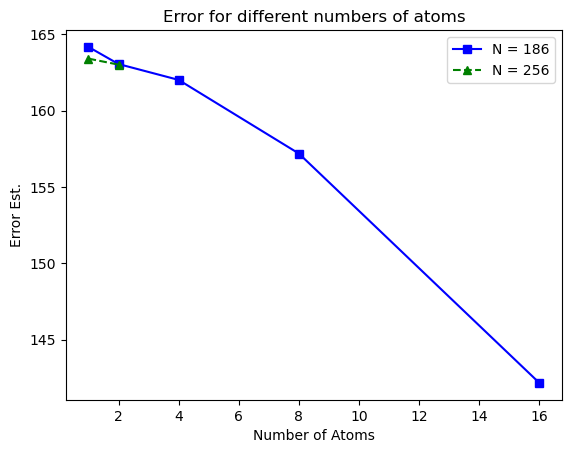

In [72]:
xs186 = [1,2,4,8,16]
ys186 = octopus_errors[186]
xs256 = [1,2]
ys256 = octopus_errors[256]
xs512 = [2,4,8]
ys512 = octopus_errors[512]
xs1842 = [2,4,8]
ys1842 = octopus_errors[1842]

plt.plot(xs186, ys186, linestyle='-', marker='s', color='blue', label = 'N = 186')
plt.plot(xs256, ys256, linestyle='--', marker='^', color='green', label = 'N = 256')
#plt.plot(xs512, ys512, linestyle=':', marker='d', color='red', label = 'N = 512')
#plt.plot(xs1842, ys1842, linestyle='-.', marker='o', color='purple', label = 'N = 1842')

plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different numbers of atoms')
plt.legend()
plt.savefig('Graphs/Octopus_Error_Est_small_N.png')
plt.show()


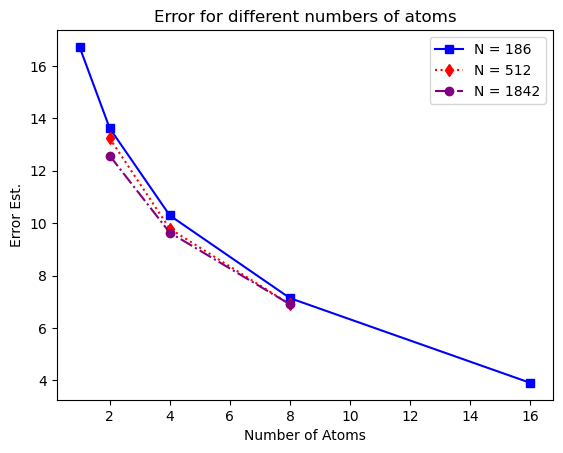

In [86]:
xs186 = [1,2,4,8,16]
#ys186 = octopus_errors[186]
xs256 = [1,2]
ys256 = octopus_errors[256]
xs512 = [2,4,8]
ys512 = octopus_errors[512]
xs1842 = [2,4,8]
ys1842 = octopus_errors[1842]

plt.plot(xs186, ys186, linestyle='-', marker='s', color='blue', label = 'N = 186')
#plt.plot(xs256, ys256, linestyle='--', marker='^', color='green', label = 'N = 256')
plt.plot(xs512, ys512, linestyle=':', marker='d', color='red', label = 'N = 512')
plt.plot(xs1842, ys1842, linestyle='-.', marker='o', color='purple', label = 'N = 1842')

plt.xlabel('Number of Atoms')
plt.ylabel('Error Est.')
plt.title('Error for different numbers of atoms')
plt.legend()
plt.savefig('Graphs/Octopus_Error_Est.png')
plt.show()

### Results

<img alt="Caption 1" height="600" src="Graphs/Octopus_Error_Est.png" width="800"/>


In [63]:
octopus_errors

{512: [13.242186606184813, 9.789715176606133, 6.906319955139147],
 1842: [12.576150723750777, 9.640872379578324, 6.903842410450008],
 186: [164.16533440544174,
  163.04435253017567,
  162.0065687403697,
  157.18729682359347,
  142.1749915411592],
 256: [163.3992867001085, 163.00598316958377]}

In [77]:
L = 2
img_orig = load_image('Compressed Images/octopus.jpg')
img_orig_flat = img_orig.copy().flatten()
#octopus_errors[N] = []
for N in [186, 256, 512, 1842]:
    img = load_image('Reconstructed Images/octopusN' + str(N) + 'L' + str(L) +'.jpg')
    img_flat = img.flatten()
    temp_indices = np.where(img_flat>0)[0]
    M = len(temp_indices)

    error = np.linalg.norm(img_orig_flat[temp_indices] - img_flat[temp_indices])/np.sqrt(M)
    #octopus_errors[N].append(error)
    print(error)


163.04435253017567
163.00598316958377
161.69835487765874
161.80806974879397


In [80]:
M

29913

In [51]:
    temp_recon = recon_img.copy().flatten()
temp_count = count.copy().flatten()
temp_img = img.copy().flatten()
temp_indices = np.where(temp_count>min_count)[0]
M = len(temp_indices)
error = np.linalg.norm(temp_img[temp_indices] -  (temp_recon[temp_indices]/temp_count[temp_indices]))/np.sqrt(M)

recon_img = recon_img // count
recon_img = np.clip(recon_img, 0, 255).astype(np.uint8)

array([[ 64,  63,  61, ...,  54,  56,  49],
       [ 54,  57,  59, ...,  44,  46,  59],
       [ 51,  57,  63, ..., 130, 122,  99],
       ...,
       [ 15,  15,  15, ...,  81,  83,  82],
       [ 14,  14,  13, ...,  85,  85,  88],
       [ 14,  13,  12, ...,  85,  84,  89]], dtype=uint8)

In [81]:
with open('Graphs/octopusN186.pkl', 'rb') as f:
    x = pickle.load(f)
ys186 = [error for L, N, D, error in x]


[(1,
  186,
  array([[-3.18506563e-02, -1.27343998e-01,  1.85000000e+02, ...,
           3.00000000e+01,  8.55218349e-02, -1.29176059e-01],
         [-4.30920878e-02, -1.27770510e-01,  1.87000000e+02, ...,
           4.40000000e+01,  8.53436910e-02, -1.39900575e-01],
         [-6.97904379e-02, -1.28144119e-01,  1.94000000e+02, ...,
           7.00000000e+01,  8.78572005e-02, -1.38904281e-01],
         ...,
         [-1.79465140e-01, -1.21024486e-01,  8.80000000e+01, ...,
           1.74000000e+02,  1.22651725e-01, -1.09193237e-01],
         [-1.87236146e-01, -1.20723804e-01,  9.70000000e+01, ...,
           1.75000000e+02,  1.23680926e-01, -1.12395724e-01],
         [-1.86512259e-01, -1.20732782e-01,  5.80000000e+01, ...,
           1.73000000e+02,  1.30885334e-01, -1.10705526e-01]]),
  16.723953500952994),
 (2,
  186,
  array([[ 2.00164427e-01,  1.40000000e+02, -1.36580751e-01, ...,
           2.20000000e+01, -1.24615965e-01,  1.91658247e-01],
         [ 9.39372588e-02,  1.20000000e+0

In [84]:
ys186 = [error for L, N, D, error in x]

In [93]:
stuff = {}

In [ ]:
attempt = 3

paths = ['Compressed Images/cheese_board.jpg', 'Compressed Images/chicken_n_beans.jpg', 'Compressed Images/persimmon_tomato_salad.jpg', 'Compressed Images/octopus.jpg']
new_path = 'Reconstructed Images/tea_eggs'
path = 'Compressed Images/tea_eggs.jpg'

N = 300
K = 100
I = 5
L = 4
P=8

percent= .2
min_count = 1
patch_shape = np.array([8,8])



def test_process(N=300, K = 100, I = 5, L = 4, P = 8):
    patch_shape = np.array([P, P])

    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)
    learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')

    D = learner.sparse_dictionary_learning(iters = I, output = True)
    stuff[(N,K,I,L,P)] = [D]

    (recon, error) =  learner.SPIR(path = path, percent=percent, min_count=min_count)
    stuff[(N,K,I,L,P)].append(error)

    correct_path = new_path + 'N' + str(N) + 'K' + str(K) + 'I' + str(I) + 'L' + str(L) + 'P' + str(P) + '.jpg'
    cv2.imwrite(correct_path, recon)

    with open('Graphs/tea_eggs_data_attempt' + str(attempt) + '.pkl', 'wb') as f:
        pickle.dump(stuff, f)
    stuff[(N,K,I,L,P)] = [D]


In [ ]:
for I in [0,1,2,5,10,20]:
    test_process(I=I)

for K in [65, 100, 200, 299]:
    test_process(K=K)

for P in [4,6, 8, 10, 12]:
    test_process(P=P)

0it [00:00, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

C:\Users\raino\GitHub\Sparse-Dictionary-Learning\Classes.py:554: RuntimeWarning: invalid value encountered in floor_divide
  recon_img = recon_img // count


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [100]:
with open('Graphs/tea_eggs_data_attempt' + str(1) + '.pkl', 'rb') as f:
    x = pickle.load(f)
x.k

{(66,
  65,
  0,
  1,
  8): [array([[0.15663014, 0.10891326, 0.06782937, ..., 0.13906705, 0.12377225,
          0.19277678],
         [0.16433326, 0.09171643, 0.06156819, ..., 0.13414432, 0.12302663,
          0.1981317 ],
         [0.15021087, 0.11894475, 0.07409054, ..., 0.13168296, 0.12302663,
          0.19679297],
         ...,
         [0.12068224, 0.2565194 , 0.18679164, ..., 0.11199205, 0.12451787,
          0.00803237],
         [0.11811453, 0.26941702, 0.18679164, ..., 0.11445341, 0.12377225,
          0.00937109],
         [0.11554683, 0.26655088, 0.18574811, ..., 0.11445341, 0.12377225,
          0.01070982]])],
 (66,
  65,
  1,
  1,
  8): [array([[-9.89676877e-02,  1.10000000e+01,  1.67000000e+02, ...,
           1.54000000e+02,  1.12000000e+02,  1.99946480e-02],
         [-1.01484115e-01,  1.60000000e+01,  1.88000000e+02, ...,
           1.54000000e+02,  1.06000000e+02,  2.66595306e-02],
         [-1.04387267e-01,  1.60000000e+01,  1.47000000e+02, ...,
           1.560000

In [102]:
x[(66,65, 1, 1, 8)]

[array([[-9.89676877e-02,  1.10000000e+01,  1.67000000e+02, ...,
          1.54000000e+02,  1.12000000e+02,  1.99946480e-02],
        [-1.01484115e-01,  1.60000000e+01,  1.88000000e+02, ...,
          1.54000000e+02,  1.06000000e+02,  2.66595306e-02],
        [-1.04387267e-01,  1.60000000e+01,  1.47000000e+02, ...,
          1.56000000e+02,  1.08000000e+02,  3.16581926e-02],
        ...,
        [-9.65591372e-02,  8.40000000e+01,  1.51000000e+02, ...,
          1.57000000e+02,  1.30000000e+02,  1.29132102e-01],
        [-9.98279816e-02,  7.90000000e+01,  1.56000000e+02, ...,
          1.56000000e+02,  1.36000000e+02,  8.41441436e-02],
        [-1.34473799e-01,  6.80000000e+01,  1.59000000e+02, ...,
          1.56000000e+02,  1.36000000e+02,  4.41548476e-02]]),
 8.83118767074847]

In [ ]:


#Ns = [186, 256, 512, 1042]
Ns = [512, 1842]
octopus_errors = {}
for N in Ns:
    octopus_errors[N] = []
    sam = Sampler(paths = paths, patch_shape = patch_shape, num_samples = N)

    dictionaries = []
    #Ls = [1, 2, 4, 8, 16]
    Ls = [2,4,8]
    for L in Ls:
        learner = DictionaryLearner(L=L, K=K, sampler=sam, algo = 'OMP')
        D = learner.sparse_dictionary_learning(iters = I, output = True)
        (recon, error) =  learner.SPIR(path = path, percent=percent, min_count=min_count)
        dictionaries.append((L, N, D, error))
        correct_path = new_path + 'N' + str(N) + 'L' + str(L) + '.jpg'
        cv2.imwrite(correct_path, recon)

        octopus_errors[N].append(error)

    with open('Graphs/octopusN' + str(N) + '.pkl', 'wb') as f:
        pickle.dump(dictionaries, f)


In [87]:
dic = {}


In [88]:
dic[(1,2,4)] = []

In [89]:
dic

{(1, 2, 4): []}